In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import os

from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler

import keras

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
%matplotlib inline

os.chdir(r'N:\ALGORITHMIC MARKETING\Assignment3\criteo_attribution_dataset')

DATA_FILE='criteo_attribution_dataset.tsv.gz'
df_Criteo_Attribution = pd.read_csv(DATA_FILE, sep='\t', compression='gzip')

np.random.seed(42)
n_campaigns = 400
df_Criteo_Attribution['day'] = np.floor(df_Criteo_Attribution.timestamp / 86400.).astype(int)

def add_derived_columns(df):
    df_ext = df.copy()
    df_ext['jid'] = df_ext['uid'].map(str) + '_' + df_ext['conversion_id'].map(str)
    
    min_max_scaler = MinMaxScaler()
    for cname in ('timestamp', 'time_since_last_click'):
        x = df_ext[cname].values.reshape(-1, 1) 
        df_ext[cname + '_norm'] = min_max_scaler.fit_transform(x)
    
    return df_ext


def sample_campaigns(df, n_campaigns):    
    campaigns = np.random.choice( df['campaign'].unique(), n_campaigns, replace = False )
    return df[ df['campaign'].isin(campaigns) ]


def filter_journeys_by_length(df, min_touchpoints):
    if min_touchpoints <= 1:
        return df
    else:
        grouped = df.groupby(['jid'])['uid'].count().reset_index(name="count")
        return df[df['jid'].isin( grouped[grouped['count'] >= min_touchpoints]['jid'].values )]
    
def balance_conversions(df):
    df_minority = df[df.conversion == 1]
    df_majority = df[df.conversion == 0]
    
    df_majority_jids = np.array_split(df_majority['jid'].unique(), 100 * df_majority.shape[0]/df_minority.shape[0] )
    
    df_majority_sampled = pd.DataFrame(data=None, columns=df.columns)
    for jid_chunk in df_majority_jids:
        df_majority_sampled = pd.concat([df_majority_sampled, df_majority[df_majority.jid.isin(jid_chunk)]])
        if df_majority_sampled.shape[0] > df_minority.shape[0]:
            break
    
    return pd.concat([df_majority_sampled, df_minority]).sample(frac=1).reset_index(drop=True)


def map_one_hot(df, column_names, result_column_name):
    mapper = {} 
    for i, col_name in enumerate(column_names):
        for val in df[col_name].unique():
            mapper[str(val) + str(i)] = len(mapper)
         
    df_ext = df.copy()
    
    def one_hot(values):
        v = np.zeros( len(mapper) )
        for i, val in enumerate(values): 
            v[ mapper[str(val) + str(i)] ] = 1
        return v    
    
    df_ext[result_column_name] = df_ext[column_names].values.tolist()
    df_ext[result_column_name] = df_ext[result_column_name].map(one_hot)
    
    return df_ext


C:\Users\nikhi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\nikhi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nikhi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nikhi\Anaconda3\lib\site-packages\tensorflow\python\framework\

In [3]:
df_Criteo_Attribution = add_derived_columns(df_Criteo_Attribution)

df_Criteo_Attribution = sample_campaigns(df_Criteo_Attribution, n_campaigns)

df_Criteo_Attribution = filter_journeys_by_length(df_Criteo_Attribution, 2)

df_Criteo_Attribution = balance_conversions(df_Criteo_Attribution)

df_Criteo_Attribution = map_one_hot(df_Criteo_Attribution, ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat8'], 'cats')

df_Criteo_Attribution = map_one_hot(df_Criteo_Attribution, ['campaign'], 'campaigns').sort_values(by=['timestamp_norm'])

In [5]:
fta = np.loadtxt("fta.txt")
lta = np.loadtxt("lta.txt")
linear = np.loadtxt("Linear.txt")
positiondecay = np.loadtxt("PositionDecay.txt")
reverseposdecay = np.loadtxt("ReversePosDecay.txt")
ushape = np.loadtxt("UShape.txt")
logistic = np.loadtxt("logistic.txt")
lstm_a = np.loadtxt("lstm_a.txt")
timedecay = np.loadtxt("TimeDecay.txt")

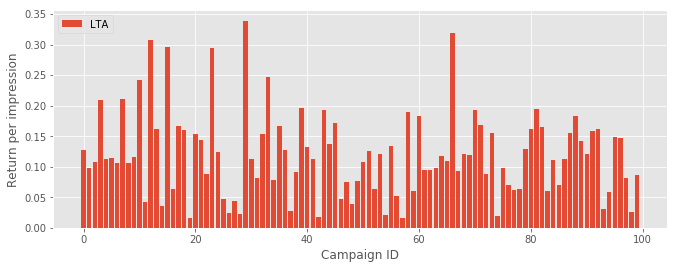

In [6]:
# Visualization of the attribution scores
campaign_idx = range(150, 250)
figlta = plt.figure(figsize=(11,4))
ax = figlta.add_subplot(111)
plt.bar( range(len(lta[campaign_idx])), lta[campaign_idx], label='LTA' )
plt.xlabel('Campaign ID')
plt.ylabel('Return per impression')
plt.legend(loc='upper left')
plt.show()

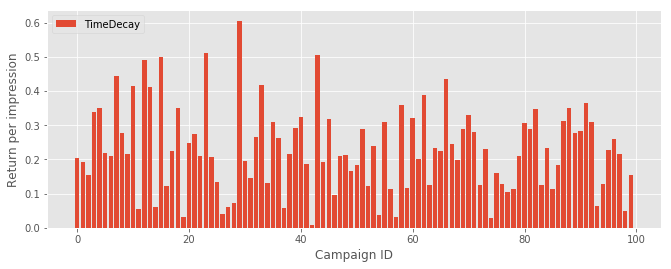

In [7]:
# Visualization of the attribution scores
campaign_idx = range(150, 250)
figtimedecay = plt.figure(figsize=(11,4))
ax = figtimedecay.add_subplot(111)
plt.bar( range(len(timedecay[campaign_idx])), timedecay[campaign_idx], label='TimeDecay' )
plt.xlabel('Campaign ID')
plt.ylabel('Return per impression')
plt.legend(loc='upper left')
plt.show()

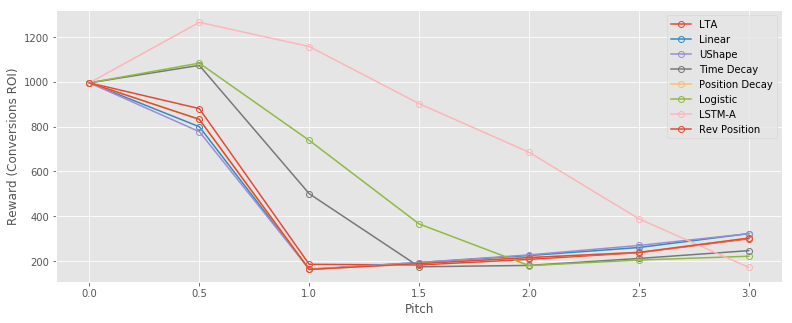

In [8]:
figline1 = plt.figure(figsize=(13, 5))

campaign_idx = range(0, 7)


ROI_LTA = [995, 880, 185, 182, 207, 237, 299]
ROI_LTA = np.array(ROI_LTA)

ROI_Linear = [995, 799, 162, 193, 224, 260, 322]
ROI_Linear = np.array(ROI_Linear)


ROI_UShape = [995, 777, 164, 193, 227, 269, 322]
ROI_UShape = np.array(ROI_UShape)

ROI_TimeDecay = [995, 1073, 500, 174, 180, 211, 246]
ROI_TimeDecay = np.array(ROI_TimeDecay)

ROI_PosDecay = [995, 832, 162, 188, 215, 238, 302]
ROI_PosDecay = np.array(ROI_PosDecay)

ROI_RevPosDecay = [995, 832, 162, 188, 215, 238, 302]
ROI_RevPosDecay = np.array(ROI_RevPosDecay)

ROI_Logistic = [995, 1083, 738, 365, 179, 204, 221]
ROI_Logistic = np.array(ROI_Logistic)

ROI_LSTM_A = [995, 1265, 1157, 902, 685, 388, 171]
ROI_LSTM_A = np.array(ROI_LSTM_A)

pitch = [0, 0.5, 1, 1.5, 2, 2.5, 3]
pitch = np.array(pitch)


plt.plot(pitch[campaign_idx], ROI_LTA[campaign_idx], label='LTA' , linestyle='-', marker='o', fillstyle=None, 
         markerfacecolor="None")
plt.plot(pitch[campaign_idx], ROI_Linear[campaign_idx], label='Linear' , linestyle='-', marker='o', fillstyle=None, 
         markerfacecolor="None")
plt.plot(pitch[campaign_idx], ROI_UShape[campaign_idx], label='UShape' , linestyle='-', marker='o', fillstyle=None, 
         markerfacecolor="None")
plt.plot(pitch[campaign_idx], ROI_TimeDecay[campaign_idx], label='Time Decay' , linestyle='-', marker='o', fillstyle=None, 
         markerfacecolor="None")
plt.plot(pitch[campaign_idx], ROI_PosDecay[campaign_idx], label='Position Decay' , linestyle='-', marker='o', fillstyle=None, 
         markerfacecolor="None")
plt.plot(pitch[campaign_idx], ROI_Logistic[campaign_idx], label='Logistic' , linestyle='-', marker='o', fillstyle=None, 
         markerfacecolor="None")
plt.plot(pitch[campaign_idx], ROI_LSTM_A[campaign_idx], label='LSTM-A' , linestyle='-', marker='o', fillstyle=None, 
         markerfacecolor="None")
plt.plot(pitch[campaign_idx], ROI_RevPosDecay[campaign_idx], label='Rev Position' , linestyle='-', marker='o', fillstyle=None, 
         markerfacecolor="None")



plt.xlabel('Pitch')
plt.ylabel('Reward (Conversions ROI)')
plt.legend(loc='upper right')
plt.show()

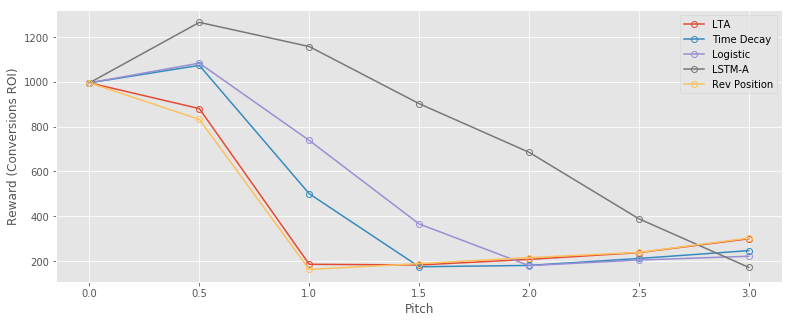

In [9]:
figline = plt.figure(figsize=(13, 5))

campaign_idx = range(0, 7)


ROI_LTA = [995, 880, 185, 182, 207, 237, 299]
ROI_LTA = np.array(ROI_LTA)

ROI_TimeDecay = [995, 1073, 500, 174, 180, 211, 246]
ROI_TimeDecay = np.array(ROI_TimeDecay)

ROI_PosDecay = [995, 832, 162, 188, 215, 238, 302]
ROI_PosDecay = np.array(ROI_PosDecay)

ROI_RevPosDecay = [995, 832, 162, 188, 215, 238, 302]
ROI_RevPosDecay = np.array(ROI_RevPosDecay)

ROI_Logistic = [995, 1083, 738, 365, 179, 204, 221]
ROI_Logistic = np.array(ROI_Logistic)

ROI_LSTM_A = [995, 1265, 1157, 902, 685, 388, 171]
ROI_LSTM_A = np.array(ROI_LSTM_A)

pitch = [0, 0.5, 1, 1.5, 2, 2.5, 3]
pitch = np.array(pitch)


plt.plot(pitch[campaign_idx], ROI_LTA[campaign_idx], label='LTA' , linestyle='-', marker='o', fillstyle=None, 
         markerfacecolor="None")
plt.plot(pitch[campaign_idx], ROI_TimeDecay[campaign_idx], label='Time Decay' , linestyle='-', marker='o', fillstyle=None, 
         markerfacecolor="None")
plt.plot(pitch[campaign_idx], ROI_Logistic[campaign_idx], label='Logistic' , linestyle='-', marker='o', fillstyle=None, 
         markerfacecolor="None")
plt.plot(pitch[campaign_idx], ROI_LSTM_A[campaign_idx], label='LSTM-A' , linestyle='-', marker='o', fillstyle=None, 
         markerfacecolor="None")
plt.plot(pitch[campaign_idx], ROI_RevPosDecay[campaign_idx], label='Rev Position' , linestyle='-', marker='o', fillstyle=None, 
         markerfacecolor="None")




plt.xlabel('Pitch')
plt.ylabel('Reward (Conversions ROI)')
plt.legend(loc='upper right')
plt.show()

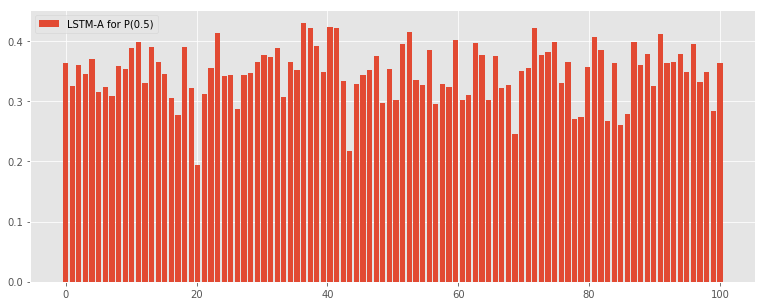

In [49]:
import matplotlib.gridspec as gridspec
figline3 = plt.figure(figsize=(13, 5))
#spec2 = gridspec.GridSpec(ncols=3, nrows=3, figure=figline3)
f2_ax7 = figline3.add_subplot( xlabel='Campaign ID (p=0.5)', ylabel='Return Per Impression')
campaign_idx = range(250, 350)

plt.bar(np.linspace(0, len(campaign_idx), len(campaign_idx)), lstm_a[campaign_idx]**0.5, label='LSTM-A for P(0.5)')
plt.legend(loc='upper left')

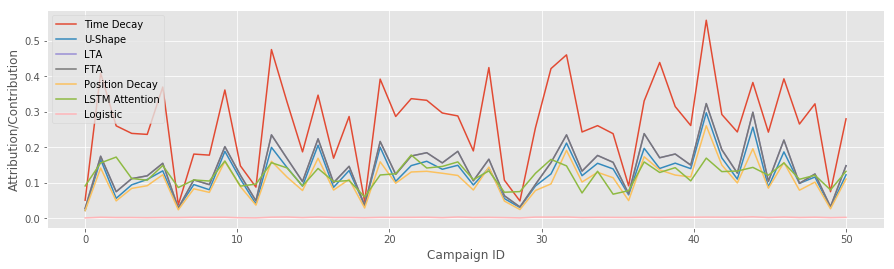

In [13]:
figline2 = plt.figure(figsize=(15, 4))
ax = figline2.add_subplot(111)

campaign_idx = range(300, 350)

plt.plot(np.linspace(0, len(campaign_idx), len(campaign_idx)), timedecay[campaign_idx], label='Time Decay' )
plt.plot(np.linspace(0, len(campaign_idx), len(campaign_idx)), ushape[campaign_idx], label='U-Shape' )
plt.plot(np.linspace(0, len(campaign_idx), len(campaign_idx)), lta[campaign_idx], label='LTA' )
plt.plot(np.linspace(0, len(campaign_idx), len(campaign_idx)), fta[campaign_idx], label='FTA' )
plt.plot(np.linspace(0, len(campaign_idx), len(campaign_idx)), positiondecay[campaign_idx], label='Position Decay' )
plt.plot(np.linspace(0, len(campaign_idx), len(campaign_idx)), lstm_a[campaign_idx], label='LSTM Attention' )
plt.plot(np.linspace(0, len(campaign_idx), len(campaign_idx)), logistic[campaign_idx], label='Logistic' )
plt.xlabel('Campaign ID')
plt.ylabel('Attribution/Contribution')
plt.legend(loc='upper left')
plt.show()

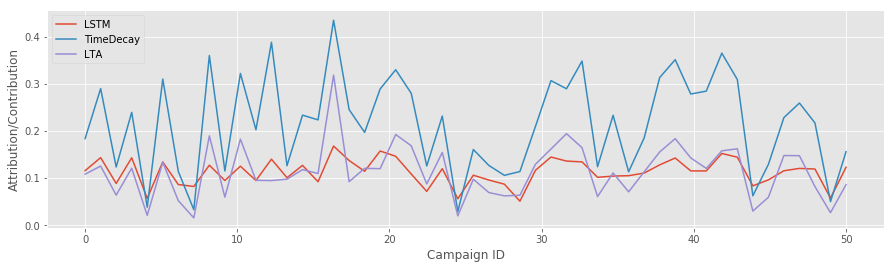

In [50]:
figline4 = plt.figure(figsize=(15, 4))
ax = figline4.add_subplot(111)

campaign_idx = range(200, 250)

plt.plot(np.linspace(0, len(campaign_idx), len(campaign_idx)), lstm_a[campaign_idx], label='LSTM' )
plt.plot(np.linspace(0, len(campaign_idx), len(campaign_idx)), timedecay[campaign_idx], label='TimeDecay' )
plt.plot(np.linspace(0, len(campaign_idx), len(campaign_idx)), lta[campaign_idx], label='LTA' )
plt.xlabel('Campaign ID')
plt.ylabel('Attribution/Contribution')
plt.legend(loc='upper left')
plt.show()

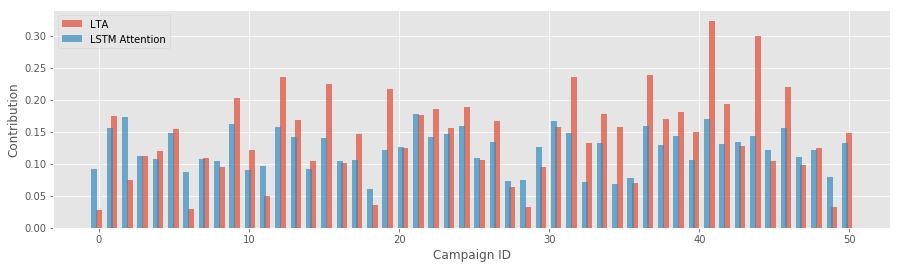

In [18]:
fig4 = plt.figure(figsize=(15, 4))
ax = fig4.add_subplot(111)

campaign_idx = range(300, 350)

ratio = max(logistic[campaign_idx]) / max(lstm_a[campaign_idx])
plt.bar(np.linspace(0, len(campaign_idx), len(campaign_idx)), lta[campaign_idx], width=0.4, alpha=0.7, label='LTA' )
plt.bar(np.linspace(0, len(campaign_idx), len(campaign_idx)) - 0.3, lstm_a[campaign_idx], width=0.4, alpha=0.7, label='LSTM Attention' )
plt.xlabel('Campaign ID')
plt.ylabel('Contribution')
plt.legend(loc='upper left')
plt.show()

<Figure size 720x288 with 0 Axes>

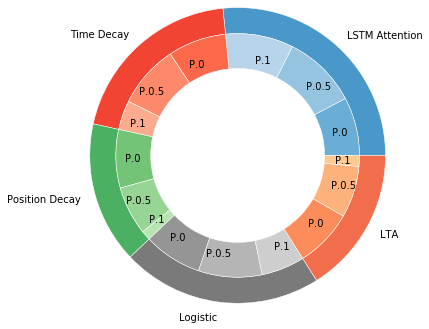

In [19]:
 
figline7=plt.figure(figsize=(10,4)) 
#ax = xyz.add_subplot(111)
# Make data: I have 3 groups and 7 subgroups
group_names=['LSTM Attention', 'Time Decay', 'Position Decay', 'Logistic', 'LTA']
group_size=[3417,2568,1989,2816, 2060]
subgroup_names=['P.0', 'P.0.5', 'P.1', 'P.0', 'P.0.5', 'P.1', 'P.0', 'P.0.5', 'P.1', 
                'P.0', 'P.0.5', 'P.1', 'P.0', 'P.0.5', 'P.1',]
subgroup_size=[995,1265,1157,995, 1073, 500,995, 832, 162, 995, 1083, 738,995, 880, 185]
 
# Create colors
a, b, c, d, e=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Greys, plt.cm.OrRd]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.7, labels=group_names, colors=[a(0.6), b(0.6), c(0.6), d(0.6), e(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.7-0.3, labels=subgroup_names, labeldistance=0.8, 
                   colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), b(0.3), c(0.5), c(0.4), c(0.3), d(0.5), d(0.4), d(0.3)
                          , e(0.5), e(0.4), e(0.3)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
# show it
plt.show()

In [20]:
df_Criteo_Conversion = df_Criteo_Attribution[df_Criteo_Attribution.conversion==1]

In [21]:
df_Criteo_Conversion.uid = df_Criteo_Conversion.uid.astype(int)
df_Criteo_Conversion.campaign = df_Criteo_Conversion.campaign.astype(int)
df_Criteo_Conversion.day = df_Criteo_Conversion.day.astype(int)

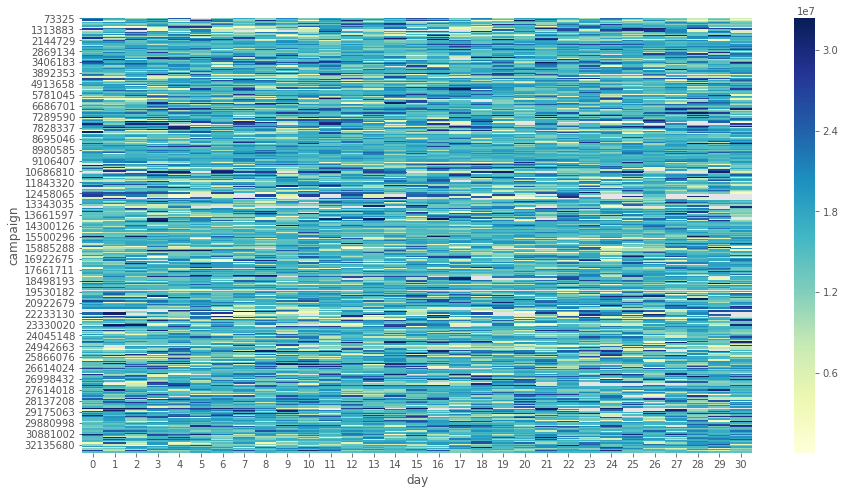

In [22]:
import seaborn as sns

#fig4 = plt.figure(figsize=(15, 4))
#ax = fig4.add_subplot(111)

df_user_camp = pd.pivot_table(df_Criteo_Conversion, values='uid', index=['campaign'], columns='day')
fig8 = plt.figure(figsize=(15, 8))
sns.heatmap(df_user_camp, cmap="YlGnBu")

In [25]:
#! pip install panel

In [26]:
import panel as pn
pn.extension()

In [27]:
title = pn.panel('## Attribution Models')
#gspec1 = pn.widgets.TextInput(name='A widget', value='A string')

In [51]:
gspec1 = pn.GridSpec(sizing_mode='stretch_both', max_height=800,background='#3f3f3f')
gspec1[0, 0:2] = figline1
gspec1[0, 2:4] = figline2
gspec1[1, 0:2] = fig4
gspec1[1, 2:4] = figline3
gspec1[2, 0:2] = figline4
gspec1[2, 2:4] = fig8
#gspec1[1, 3] = figposdecay

In [ ]:
#df_Criteo_Attribution[df_Criteo_Attribution.conversion==1].day.hist(bins=len(df_Criteo_Attribution.day.unique()))
#fighist = plt.figure(figsize=(15, 4))
#ax = fighist.add_subplot(111)
#plt.hist(df_Criteo_Attribution[df_Criteo_Attribution.conversion==1].day,bins=len(df_Criteo_Attribution.day.unique()))

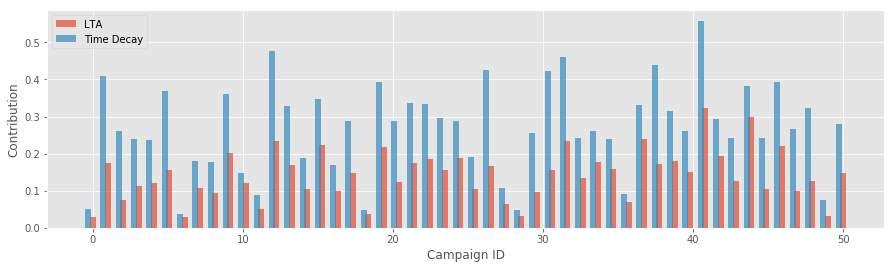

In [30]:
figlta = plt.figure(figsize=(15, 4))
ax = figlta.add_subplot(111)

campaign_idx = range(300, 350)

#ratio = max(lta[campaign_idx]) / max(UShape_attr[campaign_idx])
plt.bar(np.linspace(0, len(campaign_idx), len(campaign_idx)), lta[campaign_idx], width=0.4, alpha=0.7, label='LTA' )
plt.bar(np.linspace(0, len(campaign_idx), len(campaign_idx)) - 0.3, timedecay[campaign_idx], width=0.4, alpha=0.7, label='Time Decay' )
plt.xlabel('Campaign ID')
plt.ylabel('Contribution')
plt.legend(loc='upper left')
plt.show()

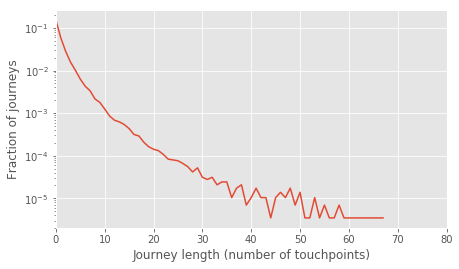

In [32]:
def journey_length_hist(df):
    counts = df.groupby(['jid'])['uid'].count().reset_index(name="count").groupby(['count']).count()
    return counts.index, counts.values / df.shape[0]

hist_x, hist_y = journey_length_hist(df_Criteo_Attribution[df_Criteo_Attribution.conversion==1])

figjourney = plt.figure(figsize=(7, 4))
ax = figjourney.add_subplot(111)
plt.plot(range(len(hist_x)), hist_y, label='all journeys')
plt.yscale('log')
plt.xlim(0, 80)
plt.xlabel('Journey length (number of touchpoints)')
plt.ylabel('Fraction of journeys')
plt.show()

In [34]:
df_cost = df_Criteo_Attribution.groupby(['day'])['cost'].sum().reset_index(name="Total Spending")
df_cost.head()

,day,Total Spending
0,0,27.495694
1,1,15.793094
2,2,14.569911
3,3,12.017904
4,4,14.576907


In [35]:
df_cpo = df_Criteo_Attribution.groupby(['day'])['cpo'].sum().reset_index(name="Total Cpo")
df_cpo.head()

,day,Total Cpo
0,0,11572.525018
1,1,3721.571104
2,2,3377.196018
3,3,2503.904141
4,4,2761.083283


Text(0,0.5,'Spending')

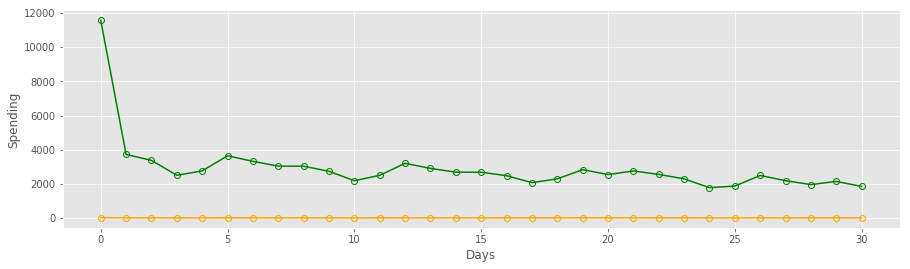

In [37]:
figcost = plt.figure(figsize=(15, 4))
ax = figcost.add_subplot(111)
plt.plot(df_cost.day, df_cost['Total Spending'], marker='o', linestyle='-', markerfacecolor="None",color='orange' )
plt.plot(df_cpo.day, df_cpo['Total Cpo'], marker='o', linestyle='-', markerfacecolor="None",color='green' )
plt.xlabel('Days')
plt.ylabel('Spending')

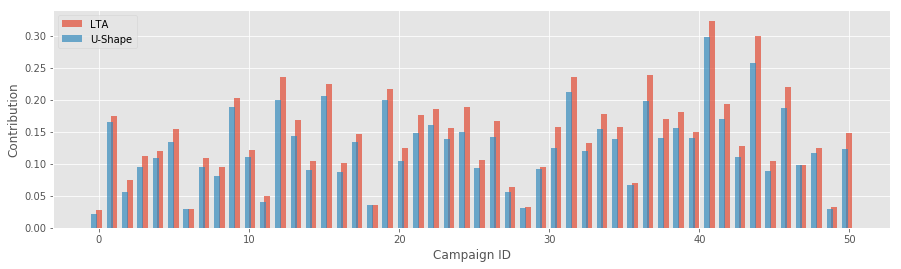

In [38]:
figcompare1 = plt.figure(figsize=(15, 4))
ax = figcompare1.add_subplot(111)

campaign_idx = range(300, 350)

#ratio = max(lta[campaign_idx]) / max(UShape_attr[campaign_idx])
plt.bar(np.linspace(0, len(campaign_idx), len(campaign_idx)), lta[campaign_idx], width=0.4, alpha=0.7, label='LTA' )
plt.bar(np.linspace(0, len(campaign_idx), len(campaign_idx)) - 0.3, ushape[campaign_idx], width=0.4, alpha=0.7, label='U-Shape' )
plt.xlabel('Campaign ID')
plt.ylabel('Contribution')
plt.legend(loc='upper left')
plt.show()

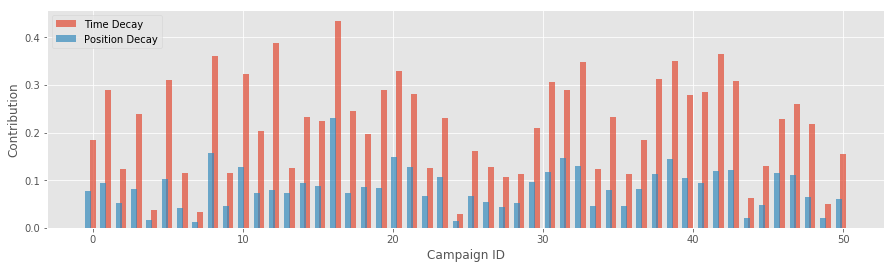

In [39]:
figcompare2 = plt.figure(figsize=(15, 4))
ax = figcompare2.add_subplot(111)

campaign_idx = range(200, 250)

plt.bar(np.linspace(0, len(campaign_idx), len(campaign_idx)), timedecay[campaign_idx], width=0.4, alpha=0.7, label='Time Decay' )
plt.bar(np.linspace(0, len(campaign_idx), len(campaign_idx)) - 0.3, positiondecay[campaign_idx], width=0.4, alpha=0.7, label='Position Decay' )
plt.xlabel('Campaign ID')
plt.ylabel('Contribution')
plt.legend(loc='upper left')
plt.show()

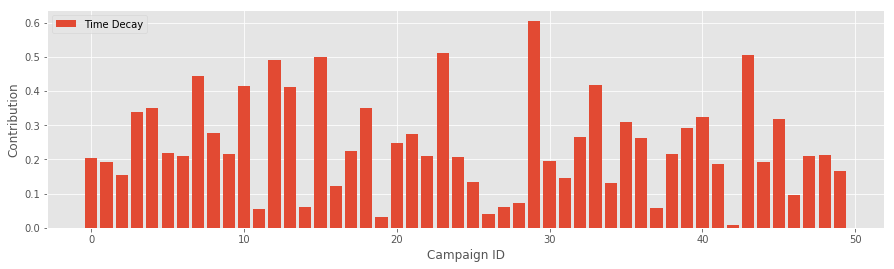

In [44]:
campaign_idx = range(150, 200)

figlstm = plt.figure(figsize=(15, 4))
ax = figlstm.add_subplot(111)
plt.bar( range(len(timedecay[campaign_idx])), timedecay[campaign_idx], label='Time Decay' )
plt.xlabel('Campaign ID')
plt.ylabel('Contribution')
plt.legend(loc='upper left')
plt.show()

In [45]:
gspec2 = pn.GridSpec(sizing_mode='stretch_both',background='#3f3f3f')
gspec2[0, 0] = figcompare2
gspec2[0, 1] = figlstm
gspec2[1, 0] = figlta
gspec2[1, 1] = figcompare1
gspec2[2, 0] = figcost
gspec2[2, 1] = figjourney
#gspec2[3, 0] = figtimedecay

In [42]:
from PIL import Image

image1 = Image.open('images/First Touch.jpg')
image2 = Image.open('images/Last Touch.jpg')
image3 = Image.open('images/Even Weights.jpg')
image4 = Image.open('images/ML.jpg')
image5 = Image.open('images/pos.jpg')
image6 = Image.open('images/time.jpg')
gspec3 = pn.GridSpec(sizing_mode='stretch_both',background='#3f3f3f')

gspec3[0, 0] = image1
gspec3[0, 1] = image2
gspec3[0, 2] = image3
gspec3[1, 0] = image4
gspec3[1, 1] = image5
gspec3[1, 2] = image6

In [52]:
tabs = pn.Tabs(('Return on Investment', gspec1),('Attribution Weights',gspec2),('Attribution Model',gspec3))
tabs.show()